# A/B-тестирование интернет-магазина

**Цель исследования:** приоритезировать 9 имеющихся гипотез по увеличению выручки, провести A/B-тестирование и найти точки роста для крупного интернет-магазина.


**Исходные данные:** 

`hypothesis.csv` содержит 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами:

- `Hypothesis` — краткое описание гипотезы;
- `Reach `— охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы


`orders.csv` содержит информацию о заказах:

- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.


`visitors.csv` содержит информацию о кпользователях:

- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

**План исследования:**
1. Первичный обзор данных и их переработка.
2. Приоритизация 9-ти имеющихся гипотез с помощью методов ICE и RICE.
3. Анализ результатов А/В теста: расчет кумулятивных метрик(выручка, средний чек, среднее количество заказов), изучение данных на аномалии и на их влияние на результаты проверки гипотез.
4. Принятие решения по состоянию А/В теста, выводы по исследованию.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Первичный-обзор-данных" data-toc-modified-id="Первичный-обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Первичный обзор данных</a></span></li><li><span><a href="#Переработка-данных" data-toc-modified-id="Переработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Переработка данных</a></span></li><li><span><a href="#Приоритизация-гипотез" data-toc-modified-id="Приоритизация-гипотез-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Приоритизация гипотез</a></span><ul class="toc-item"><li><span><a href="#Приоретизация-гипотез-фреймворком-ICE" data-toc-modified-id="Приоретизация-гипотез-фреймворком-ICE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Приоретизация гипотез фреймворком ICE</a></span></li><li><span><a href="#Приоретизация-гипотез-фреймворком-RICE" data-toc-modified-id="Приоретизация-гипотез-фреймворком-RICE-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Приоретизация гипотез фреймворком RICE</a></span></li></ul></li><li><span><a href="#Анализ-A/B-теста" data-toc-modified-id="Анализ-A/B-теста-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ A/B-теста</a></span><ul class="toc-item"><li><span><a href="#Кумулятивная-выручка-по-группам" data-toc-modified-id="Кумулятивная-выручка-по-группам-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Кумулятивная выручка по группам</a></span></li><li><span><a href="#Кумулятивный-средний-чек-по-группам" data-toc-modified-id="Кумулятивный-средний-чек-по-группам-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Кумулятивный средний чек по группам</a></span></li><li><span><a href="#Кумулятивное-среднее-количество-заказов-по-группам" data-toc-modified-id="Кумулятивное-среднее-количество-заказов-по-группам-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Кумулятивное среднее количество заказов по группам</a></span></li><li><span><a href="#Изучение-данных-о-количестве-заказов-на-аномалии-и-выбросы" data-toc-modified-id="Изучение-данных-о-количестве-заказов-на-аномалии-и-выбросы-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Изучение данных о количестве заказов на аномалии и выбросы</a></span></li><li><span><a href="#Изучение-данных-о-стоимости-заказов-на-аномалии-и-выбросы" data-toc-modified-id="Изучение-данных-о-стоимости-заказов-на-аномалии-и-выбросы-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Изучение данных о стоимости заказов на аномалии и выбросы</a></span></li><li><span><a href="#Расчет-статистической-значимости-различий-в-среднем-количестве-заказов-и-в-среднем-чеке-между-группами-по-«сырым»-данным" data-toc-modified-id="Расчет-статистической-значимости-различий-в-среднем-количестве-заказов-и-в-среднем-чеке-между-группами-по-«сырым»-данным-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Расчет статистической значимости различий в среднем количестве заказов и в среднем чеке между группами по «сырым» данным</a></span></li><li><span><a href="#Расчет-статистической-значимости-различий-в-среднем-количестве-заказов-и-в-среднем-чеке-между-группами-по-«очищенным»-данным" data-toc-modified-id="Расчет-статистической-значимости-различий-в-среднем-количестве-заказов-и-в-среднем-чеке-между-группами-по-«очищенным»-данным-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Расчет статистической значимости различий в среднем количестве заказов и в среднем чеке между группами по «очищенным» данным</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Первичный обзор данных

In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.stats as stats
import datetime as dt

In [17]:
try:
    hypothesis = pd.read_csv('hypothesis.csv')
except:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')

pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150 
hypothesis 

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [18]:
try:
    orders = pd.read_csv('orders.csv')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
    
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [19]:
try:
    visitors = pd.read_csv('visitors.csv')
except:
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')
    
visitors.info()
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


**Промежуточные итоги:** датасеты не содержат пропусов, однако стоит их проверить на наличие аномалий и выбросов, а также привести названия столбцов к единому стилю.

## Переработка данных

In [20]:
# изменение названий столбцов
hypothesis.columns = hypothesis.columns.str.lower()
orders.columns = orders.columns.str.lower()

In [21]:
# приведение к нужному формату данных
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [22]:
visitors['group'].unique()
orders['group'].unique()

array(['B', 'A'], dtype=object)

In [23]:
# проверка на дубликаты пользователей в группах

print(orders['visitorid'].nunique())
print(orders.groupby('group').agg({'visitorid':'nunique'}).sum())

orders.groupby('group').agg({'visitorid':'nunique'}).sum() - orders['visitorid'].nunique()

1031
visitorid    1089
dtype: int64


visitorid    58
dtype: int64

**Промежуточные итоги:** нахвания столбцов приведены к змеиному регистру, данные проверены на выбросы и дубликаты. Выбросы будут удалены далее по ходу исследования.

## Приоритизация гипотез

### Приоретизация гипотез фреймворком ICE

In [24]:
def get_ice(data):
    data['ice'] = round(data['impact'] * data['confidence'] / data['efforts'], 2)
    return data.sort_values(by = 'ice', ascending = False)
   
pd.DataFrame(get_ice(hypothesis)).style.background_gradient(subset=['reach', 'impact', 'confidence', 'efforts','ice']
                                                            , cmap='Blues')

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.330000
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.330000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.120000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


### Приоретизация гипотез фреймворком RICE

In [25]:
def get_rice(data):
    data['rice'] = round(data['reach'] * data['impact'] * data['confidence'] / data['efforts'], 2)
    return data.sort_values(by = 'rice', ascending = False)    
    
pd.DataFrame(get_rice(hypothesis)).style.background_gradient(subset=['reach', 'impact', 'confidence', 'efforts', 'rice']
                                                             , cmap='Blues')

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.000000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.330000,40.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.200000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.120000,9.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.330000,4.000000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.000000


Фреймворки ICE и RISE показали разные результаты приоритизации гипотез. Согнасно ICE-анализу, самой приоритетной является 8 гипотеза: **Запустить акцию, дающую скидку на товар в день рождения**. Разрыв по ICE между ней и следующими двумя гипотезами не слишком большой, до 20%. Далее идут:
- 0: *Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей*, 
- 7: *Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок*, 
- 6: *Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию*. 
Данный фреймворк не учитывает параметр охвата пользователей, поэтому лидируют гипотезы, которые сильнее всего повлияют на пользователей. 

По RICE-анализу, который уже учитывает параметр охвата, лидирует 7: **Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок** гипотеза с отрывом по показателю RICE в 2 раза по сравнению со следующей гипотезой в рейтинге. Далее идут:
- 2: *Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа*, 
- 0: *Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей*,
- 6: *Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию*.

## Анализ A/B-теста

### Кумулятивная выручка по группам

In [26]:
dates_groups = orders[['date','group']].drop_duplicates() 

# получаем агрегированные кумулятивные по дням данные о заказах
orders_aggregated = (
    dates_groups
    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date' : 'max', 
          'group' : 'max', 
          'transactionid': pd.Series.nunique, 
          'visitorid' : pd.Series.nunique, 
          'revenue' : 'sum'}), axis=1)
    .sort_values(by=['date','group']))


# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitors_aggregated = (
    dates_groups
    .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date' : 'max', 
          'group' : 'max', 
          'visitors' : 'sum'}), axis=1)
    .sort_values(by=['date','group']))



# объединяем кумулятивные данные в одной таблице

cumulative_data = orders_aggregated.merge(visitors_aggregated, 
                                          left_on=['date', 'group'],
                                          right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


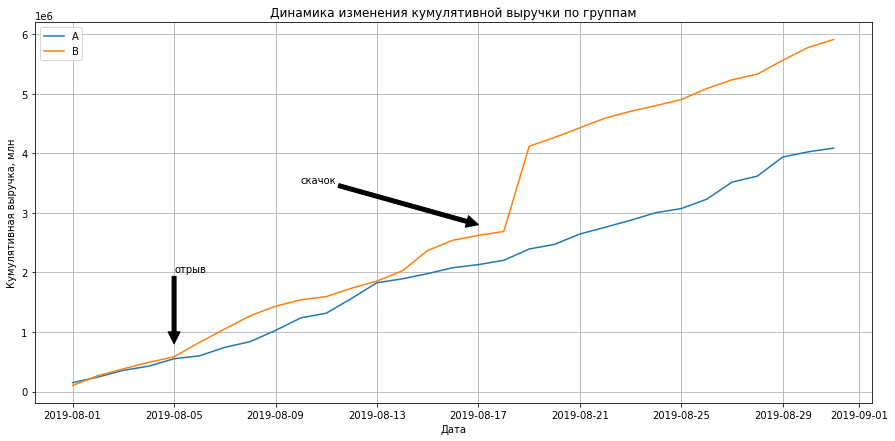

In [27]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders', 'visitors']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders', 'visitors']]

plt.figure(figsize=(15, 7))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
plt.legend()
plt.grid(True)
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка, млн')
plt.title('Динамика изменения кумулятивной выручки по группам')

plt.annotate('скачок', xy=(dt.datetime(2019, 8, 17), 2800000), xytext=(dt.datetime(2019, 8, 10), 3500000),
            arrowprops=dict(facecolor='black'))
plt.annotate('отрыв', xy=(dt.datetime(2019, 8, 5), 800000), xytext=(dt.datetime(2019, 8, 5), 2000000),
            arrowprops=dict(facecolor='black'));

Как видно по графику, кумулятивная выручка группы B на всем периоде анализа преобладает над группой А. В районе 19-08-21 видно резкое увеличение выручки в группе В, возможно, это был какой-то крупный дорогостоящий заказ. 

### Кумулятивный средний чек по группам

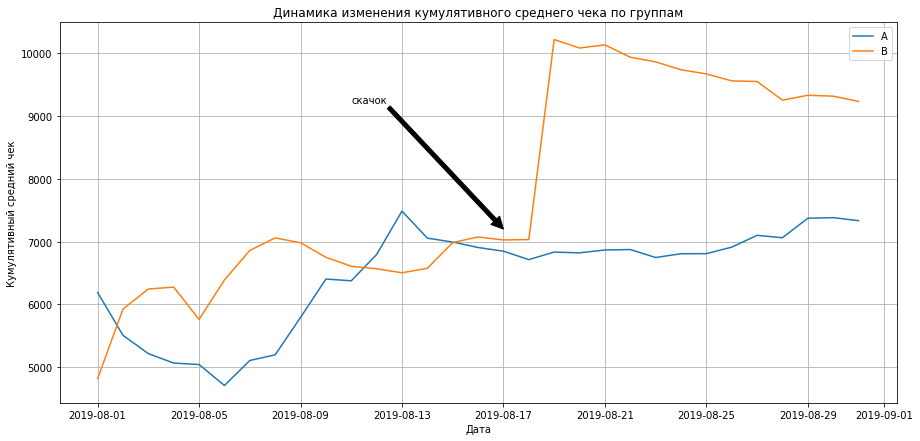

In [28]:
cumulative_revenue_a['revenue_mean'] = cumulative_revenue_a['revenue']/cumulative_revenue_a['orders']
cumulative_revenue_b['revenue_mean'] = cumulative_revenue_b['revenue']/cumulative_revenue_b['orders']

plt.figure(figsize=(15, 7))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue_mean'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue_mean'], label='B')
plt.legend() 
plt.grid(True)
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.title('Динамика изменения кумулятивного среднего чека по группам')

plt.annotate('скачок', xy=(dt.datetime(2019, 8, 17), 7200), xytext=(dt.datetime(2019, 8, 11), 9200),
            arrowprops=dict(facecolor='black'));

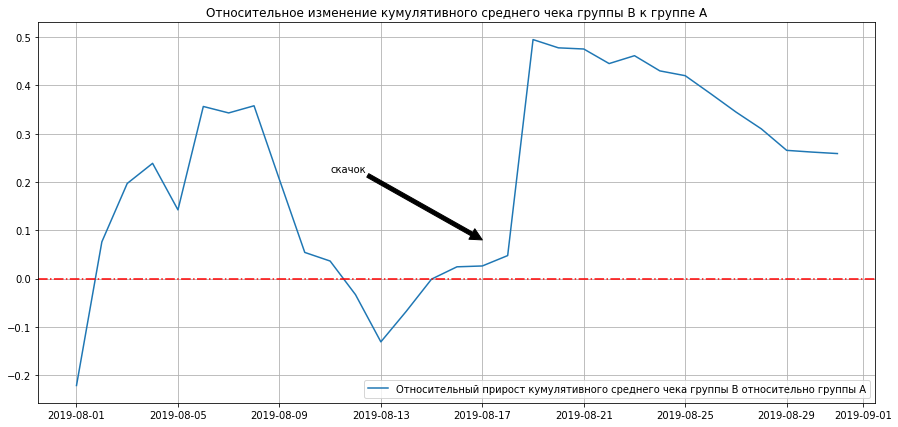

In [29]:
# собираем данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, 
                                                   left_on='date', 
                                                   right_on='date', 
                                                   how='left', 
                                                   suffixes=['A', 'B'])
merged_cumulative_revenue['revenue_b_a'] = ((merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA']) - 1)

plt.figure(figsize=(15, 7))
plt.plot(merged_cumulative_revenue['date'], 
         merged_cumulative_revenue['revenue_b_a'],
         label = 'Относительный прирост кумулятивного среднего чека группы B относительно группы A')
plt.legend()
plt.axhline(y=0, color='red', linestyle='-.')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.grid(True)
plt.annotate('скачок', xy=(dt.datetime(2019, 8, 17), 0.08), xytext=(dt.datetime(2019, 8, 11), 0.22),
            arrowprops=dict(facecolor='black'));

В начале исследуемого периода кумулятивный средний чек группы B преобладал над группой А. В тех же датах, что и резкое увеличение выручки, произошел скачек среднего чека по группе B. Без него, вероятно, к концу периодна средние чеки обоих групп были бы примерно на одном уровне с незначительным преобладанием группы А над группой В.

### Кумулятивное среднее количество заказов по группам

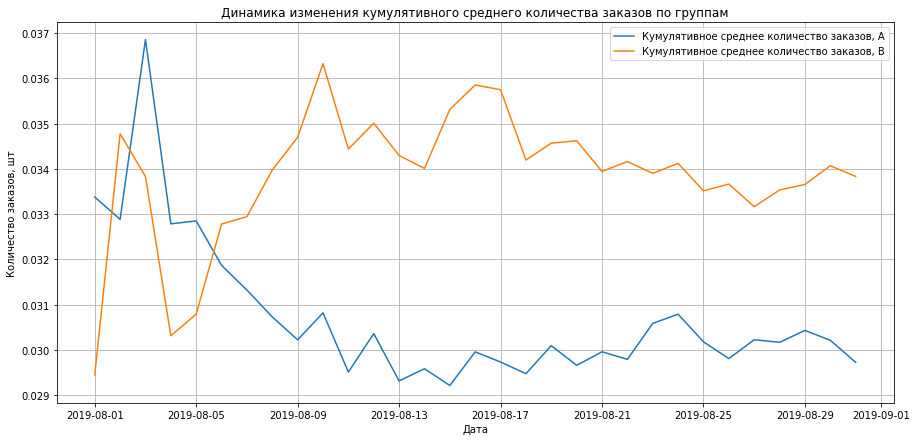

In [30]:
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# отделяем данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

plt.figure(figsize=(15, 7))
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='Кумулятивное среднее количество заказов, A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='Кумулятивное среднее количество заказов, B')
plt.legend()
plt.grid(True)
plt.xlabel('Дата')
plt.ylabel('Количество заказов, шт')
plt.title('Динамика изменения кумулятивного среднего количества заказов по группам');

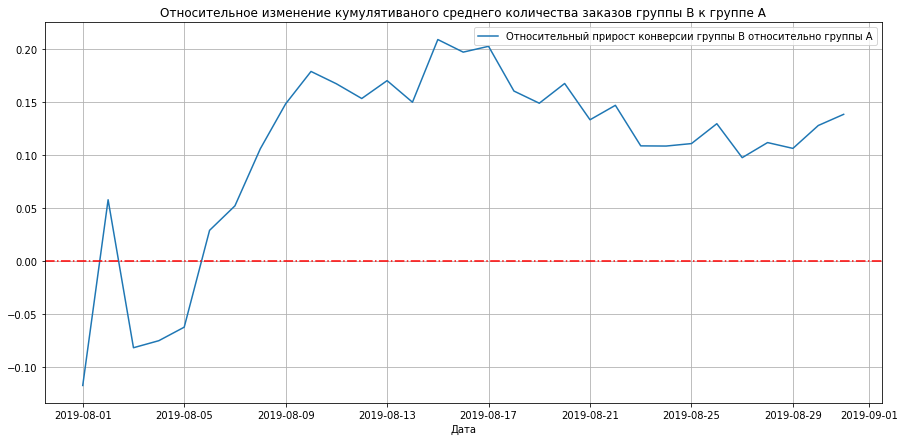

In [31]:
merged_сumulative_conversions = cumulative_data_a[['date','conversion']].merge(cumulative_data_b[['date','conversion']], 
                                                                               left_on='date', 
                                                                               right_on='date', 
                                                                               how='left', 
                                                                               suffixes=['A', 'B'])

merged_сumulative_conversions['conversion_b_a'] = merged_сumulative_conversions['conversionB']/merged_сumulative_conversions['conversionA'] - 1

plt.figure(figsize=(15, 7))
plt.plot(merged_сumulative_conversions['date'], 
         merged_сumulative_conversions['conversion_b_a'], 
         label = 'Относительный прирост конверсии группы B относительно группы A')
plt.legend()
plt.axhline(y=0, color='red', linestyle='-.')
plt.grid(True)
plt.title('Относительное изменение кумулятиваного среднего количества заказов группы B к группе A')
plt.xlabel('Дата');

В начале периода видны сильные искажения из-за недостатка данных. К концу периода значения конверсий стабилизируются: пользователи группы В (конверсия примерно 3.4%) конвертируются лучше пользователей группы А (конверсия примерно 3%).

### Изучение данных о количестве заказов на аномалии и выбросы

count    1031.000000
mean        1.161009
std         0.724919
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: transactionid, dtype: float64

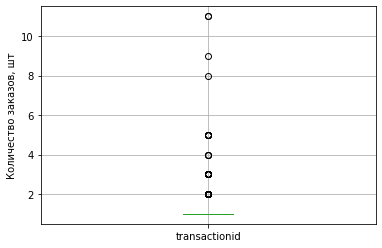

In [32]:
# изучим данные по количеству заказов на каждого пользователя

orders_per_user = (
    orders
    .groupby('visitorid', as_index = False)
    .agg({'transactionid' : 'nunique'})
    .sort_values(by = 'transactionid', ascending = False))

orders_per_user.head()
orders_per_user.boxplot('transactionid')
plt.ylabel('Количество заказов, шт');
orders_per_user['transactionid'].describe()

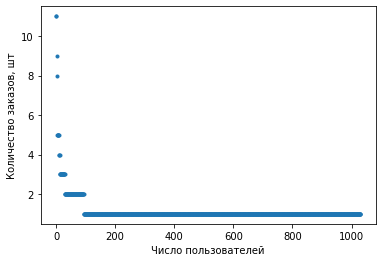

In [33]:
# серия из чисел от 0 до количества наблюдений в orders_per_user
x_values = pd.Series(range(0, len(orders_per_user)))

plt.scatter(x_values , orders_per_user['transactionid'], marker = '.')
plt.ylabel('Количество заказов, шт')
plt.xlabel('Число пользователей');

В среднем пользователи делают всего по 1 заказу, однако есть и те, кто совершает 8 и более. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя и определим градницу границу для отсечения аномальных пользователей.

In [34]:
np.percentile(orders_per_user['transactionid'], [95, 99])

array([2., 4.])

Не более 5% пользователей совершали более двух заказов, и не более 1% - более четырех.

### Изучение данных о стоимости заказов на аномалии и выбросы

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

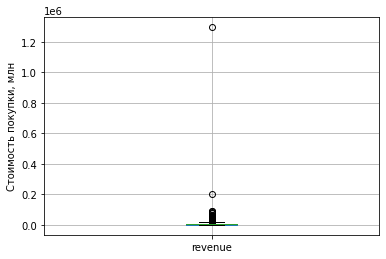

In [35]:
# изучим данные о выручке

orders.boxplot('revenue')
plt.ylabel('Стоимость покупки, млн');
orders['revenue'].describe()

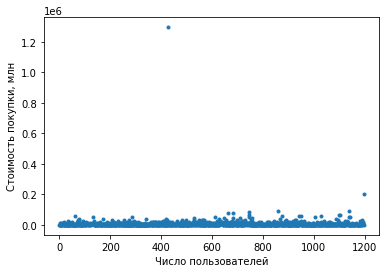

In [36]:
# серия из чисел от 0 до количества наблюдений в orders_per_user
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values , orders['revenue'], marker = '.')
plt.ylabel('Стоимость покупки, млн')
plt.xlabel('Число пользователей');

In [37]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

В среднем пользователи совершают покупки на 8400, однако в данных есть большой выброс: кто-то совершил покупку на сумму больше 1 миллиона. Вероятно, именно это повлияло на резкие скачки в графиках среднего чека. Не более 5% от всех заказов были на сумму более 2800, и не более 1% - на сумму более 58250.

### Расчет статистической значимости различий в среднем количестве заказов и в среднем чеке между группами по «сырым» данным

**Расчет по среднему количеству заказов**

```
H_0: Вероятность того, что наблюдение из группы В превышает наблюдение из популяции В равна 50% 
H_a: Вероятность того, что наблюдение из группы В превышает наблюдение из популяции В не равна 50%
alpha = 0.05
```

In [38]:
# по среднему количеству заказов

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB  = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorid', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                cumulative_revenue_a.tail(1)['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                cumulative_revenue_b.tail(1)['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [39]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.017
0.138


По «сырым» данным различия в среднем количестве заказов групп A и B есть. `p-value` составляет 0.017, он меньше статистического уровня значимости 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, мы отвергаем. Группа B выигрывает в среднем количестве заказов на 13,8%.

**Расчет по среднему чеку**

In [40]:
# по среднему чеку 

print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.729
0.259


По «сырым» данным различий в среднем чеке групп A и B нет. `p-value` составляет 0.729, он больше статистического уровня значимости 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет, мы не отвергаем. Однако группа B выигрывает в среднем количестве заказов на 25,9%.

### Расчет статистической значимости различий в среднем количестве заказов и в среднем чеке между группами по «очищенным» данным

**Расчет по среднему количеству заказов**

In [41]:
# очистка данных о среднем количестве заказов 
# исключим всех пользователей, совершивших более 2х заказов

users_with_2_or_more = (
    orders
    .groupby('visitorid')
    .agg({'transactionid': pd.Series.nunique})
    .query('transactionid >= 2')
    .reset_index())


print('Пользователей с числом заказов больше 2:', users_with_2_or_more['visitorid'].shape[0])
print('Данных после очистки осталось', round((1 - users_with_2_or_more['visitorid'].shape[0] / orders.shape[0]) * 100, 2),'%')

Пользователей с числом заказов больше 2: 94
Данных после очистки осталось 92.15 %


In [42]:
# подготавливаем очищенные данные
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorid'].isin(users_with_2_or_more['visitorid']))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                cumulative_revenue_a.tail(1)['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorid'].isin(users_with_2_or_more['visitorid']))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                cumulative_revenue_b.tail(1)['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [43]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.009
0.183


После очистки данных осталось 92.15 % от исходного объема. По «очищенным» данным различия в среднем количестве заказов групп A и B всё ещё есть. `p-value` составляет 0.009, он меньше статистического уровня значимости 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, мы отвергаем. Группа B выигрывает в среднем количестве заказов на 18,3%, на 5% больше, чем до очистки данных.

**Расчет по среднему чеку**

In [44]:
# очистка данных о среднем чеке
# исключим всех пользователей, совершивших покупку на сумму более 28000

users_with_28000_or_more = orders.query('revenue >= 28000')

print('Пользователей с суммой покупки более 28000:', users_with_28000_or_more['visitorid'].shape[0])
print('Данных после очистки осталось', round((1 - users_with_28000_or_more['visitorid'].shape[0] / orders.shape[0]) * 100, 2),'%')

Пользователей с суммой покупки более 28000: 60
Данных после очистки осталось 94.99 %


In [48]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(users_with_28000_or_more['visitorid'])),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(users_with_28000_or_more['visitorid'])),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(users_with_28000_or_more['visitorid'])),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(users_with_28000_or_more['visitorid'])),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.863
-0.013


После очистки данных осталось 94.99% от исходного объема. По «очищенным» данным различий в среднем чеке групп A и B нет. `p-value` составляет 0.863, он больше статистического уровня значимости 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет, мы не отвергаем. Согласно очищенным данным, выигрывает уже группа А с преимуществом в 1,3%.

## Выводы

1. Произведен первичный обзор и обработка трех датафреймов: одного со списком гипотез и двух с данными о продажах и визитах по группам А и Б. Преобразованы форматы данных, исправлены заголовки столбцов. Среди данных о выручке и количестве заказов на пользователя найдены выбросы (большие значения), их влияние на результаты теста будет оценено далее в работе.


2. Самой приоритетной гипотезой по ICE-фреймворку является **Запустить акцию, дающую скидку на товар в день рождения**: она окажет наиболее сильное влиятие со средними затратами на реализацию, однако охватит минимальную группу пользователей.
3. Самой приоритетной гипотезой по ICE-фреймворку является **Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок**: она окажет достаточно сильное врияние с самым большим охватом при таких же затратах и степени надежности, что и гипотеза из ICE.



4. Статистически значимая разница в среднем количестве заказов есть как по  «сырым» данным, так и по «очищенным». Группа B выигрывает в среднем количестве заказов на 18,3%, на 5% больше, чем до очистки данных.
5. Разницы в среднем чеке по группам по «сырым» и «очищенным» данным нет. Однако, согласно «сырым» данным, средний чек группы В в среднем на 25,9% больше, чем у группы А; после очистки же группа В стала проигрывать группе А на 1,3%.


6. На динамику кумулятивной выручки и среднего чека до очистки данных сильно повлияли выбросы. Кумулятивное среднее количество заказов по группам демонстрирует стабильную динамику, в группе В заказов в среднем больше, чем в группе А. Однако, согласно проверке гипотез, такой разницы недостаточно, чтобы она была статистически значимой. Кумулятивная выручка группы B на всем периоде анализа преобладает над группой А.

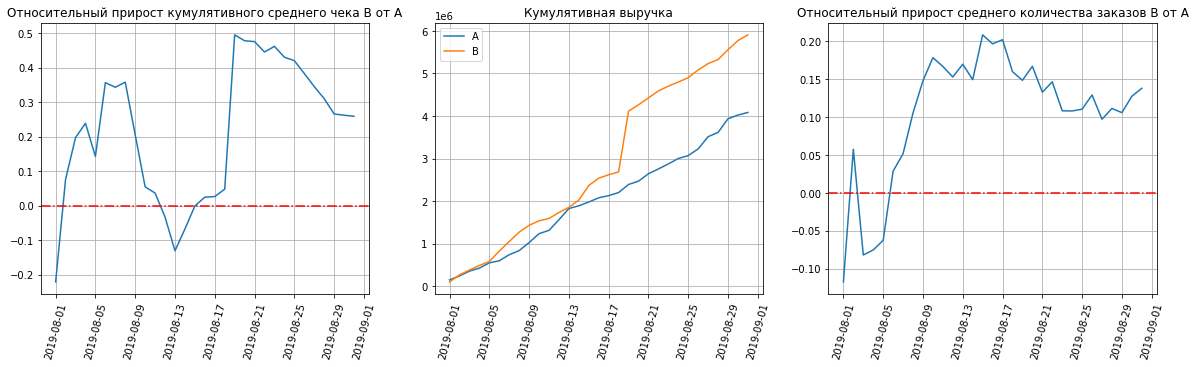

7. Тест следует продолжить: группа В выигрывает по количеству заказов, а динамика изменение среднего чека ещё не стабилизировалась. Кумулятивная выручка группы В также выше, чем у группы А. Стоит понаблюдать за динамикой среднего чека, пока он не стабилизируется (к концу данного исследуемого периода он имеет отрицательную относительную динамику роста - падает). Далее есть три варианта: 

    - если после завершения рекомендованного времени проведения A/B теста* относительное изменение среднего чека стабилизируется на уровне не ниже 0, то тест следует остановить и признать успешным: даже без статистически значимого преимущества по среднему чеку пользователи стали делать больше заказов, а значит выручка в целом увеличится;
    
    - если после завершения рекомендованного времени проведения A/B теста относительное изменение среднего чека всё так же будет падать или установится на уровне ниже 0, то тест следует остановить и признать неуспешным: даже не смотря на большее количество заказов, пользователи стали тратить меньше денег;
    
    - если после завершения рекомендованного времени проведения A/B теста показатель среднего чека так и не зафиксируется на одном уровне и будет колебаться, тест следует остановить и проанализировать динамику колебаний: возможно, там будет присутствовать сезонный фактор. Если статистически значимых различий между группами все ещё не будет, тест можно признать успешным.
    
    
** Рекомендованное время проведения А/B теста согласно https://vwo.com/tools/ab-test-duration-calculator/ при параметрах Estimated existing conversion rate 3.2% и Minimum improvement in conversion rate you want to detect 10% составляет 161 день, то есть примерно 5 месяцев.*    


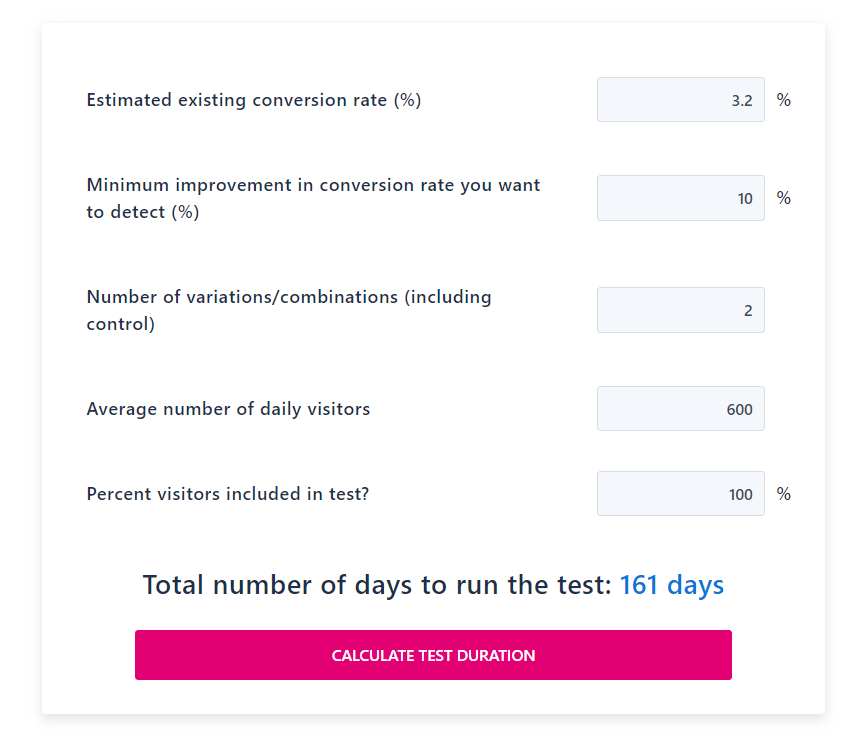

In [49]:
visitors['visitors'].mean()

607.2903225806451